In [1]:
import numpy as np
import pandas as pd
from joblib import load

In [2]:
df = load("/content/drive/Othercomputers/My Laptop/github-repositories/transformer-multi/data/inD-dataset-v1.0/data/inD_train.pkl")

In [ ]:
df.iloc[12680:12700]

In [3]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import shapely
from shapely import MultiPoint

import geopandas as gpd
from shapely.geometry import Polygon


CENTER = Polygon([
(126.9483,-84.46665),
(170.6603,-60.82265),
(161.4343,-34.85665),
(112.8543,-54.99365),
])

#xmin,ymin,xmax,ymax =  polygon.bounds

#width = 5
#height = 5

#polygon = shape(geojson['features'][i]['geometry'])
#polygon = CENTER

resolution = 5  # meters
xmin, ymin, xmax, ymax = CENTER.bounds

# construct rectangle of points
x, y = np.round(np.meshgrid(np.arange(xmin, xmax, resolution), np.arange(ymin, ymax, resolution)),4)
points = MultiPoint(list(zip(x.flatten(),y.flatten())))

# get grid dimensions
m = np.transpose(y)[0].shape[0]
n = x[0].shape[0]


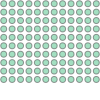

In [4]:
points

In [5]:
print(m,n)

10 12


In [9]:
x[0]

array([112.8543, 117.8543, 122.8543, 127.8543, 132.8543, 137.8543,
       142.8543, 147.8543, 152.8543, 157.8543, 162.8543, 167.8543])

In [8]:
np.transpose(y)[0]


array([-84.4666, -79.4666, -74.4666, -69.4666, -64.4666, -59.4666,
       -54.4666, -49.4666, -44.4666, -39.4666])

In [25]:
def get_index(x_values,y_values,grid_x_values, grid_y_values):

    m = grid_y_values.shape[0]
    n = grid_x_values.shape[0]

    # create empty grid
    grid = np.zeros((m+1,n+1), dtype=int)
    #print(grid.shape)

    # Get index for a list of points (coordinates)
    xindex = np.digitize(x_values, grid_x_values)
    yindex = np.digitize(y_values, grid_y_values)

    #print(xindex,yindex)
    # fill the grid

    for (col, row) in zip(xindex, yindex):
        grid[row,col] = 1

    # Remove borders of the grid, remove outside elements
    grid = grid[1:-1, 1:-1]
    return grid
#999.7384, 1004.7384, 1009.7384, 1014.7384, 1019.7384, 1024.7384,
  #     1029.7384, 1034.7384]

In [26]:
get_index([168,112],[-54,-54],x[0],np.transpose(y)[0])

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
# Read train dataset
df = pd.read_csv("/content/drive/Othercomputers/My Laptop/github-repositories/wavenet-trajectory/data/DR_USA_Intersection_MA/_train.csv", sep=',')

df = df.head(700)

groups = df.groupby(['frame_ix'])

for name, group in groups:
   # print(len(group.x.values),len(group.y.values))
    #print(group)
    g = get_index(group.x.values,group.y.values)
    print(g)